# We will analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

# As the original TAFE dataset is no longer available in the internet, both datasets are saved in this Github profile.

# Below is a preview of a couple columns we'll work with from the dete_survey.csv:
    ID: An id used to identify the participant of the survey
    SeparationType: The reason why the person's employment ended
    Cease Date: The year or month the person's employment ended
    DETE Start Date: The year the person began employment with the DETE

# Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
    Record ID: An id used to identify the participant of the survey
    Reason for ceasing employment: The reason why the person's employment ended
    LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

# Part I and II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dete_survey = pd.read_csv ("C://Users//johng//Desktop//data//dete_survey.csv", na_values='Not Stated', encoding="utf-8")

In [3]:
tafe_survey = pd.read_csv ("C://Users//johng//Desktop//data//tafe_survey.csv", encoding="utf-8")

In [4]:
dete_survey.shape

(822, 56)

In [5]:
tafe_survey.shape

(702, 72)

# Part II

##### Drop some columns that we won't use in our analysis to make the dataframes easier to work with:

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [7]:
dete_survey_updated.shape

(822, 35)

In [8]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [9]:
tafe_survey_updated.shape

(702, 23)

# Part III

##### Column names padronization:

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

In [11]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
tafe_survey_updated = tafe_survey_updated.rename(columns={"Record ID": "id", 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [13]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Part IV

##### Study the reason why the employee left:

In [14]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [16]:
pattern = r"(Resignation)"
dete_resign = dete_survey_updated.copy('separationtype')
d_resign = dete_resign['separationtype'].str.contains(pattern)
dete_resignations = dete_resign[d_resign]

In [17]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
##### Drop na value from TAFE dataframe:
tafe_survey_updated = tafe_survey_updated.dropna()

In [19]:
pattern = r"(Resignation)"
tafe_resign = tafe_survey_updated.copy('separationtype')

In [20]:
t_resign = tafe_resign['separationtype'].str.contains(pattern)

In [21]:
tafe_resignations = tafe_resign[t_resign]

In [22]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4


# Part V

In [23]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [24]:
dete_resignations['cease_date'].dropna()

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
        ...   
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 300, dtype: object

In [25]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

##### Change dete_resignations['cease_date'] to type float:

In [26]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(?P<Years>[1-2][0-9]{3})')

In [27]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

# Part VI

##### Creating an institute_service in DETE dataframe. This column shows how many years the employee worked:

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Part VII

#####  How many employees left because they were dissatisfied? We will do some cleaning in both dataframes two answer that:

In [29]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [30]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    211
True      77
Name: dissatisfied, dtype: int64

In [31]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department']].applymap(update_vals).any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

True    311
Name: dissatisfied, dtype: int64

In [32]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False


# Part VIII - aggregating both dataframes:

In [33]:
dete_resignations_up['institute'] = 'DETE'

In [34]:
tafe_resignations_up['institute'] = 'TAFE'

In [35]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [36]:
combined_null = combined.isnull().sum()
combined_null

id                                                       0
separationtype                                           0
cease_date                                              11
dete_start_date                                        316
role_start_date                                        328
position                                                 3
classification                                         438
region                                                 334
business_unit                                          567
employment_status                                        4
career_move_to_public_sector                           288
career_move_to_private_sector                          288
interpersonal_conflicts                                288
job_dissatisfaction                                    288
dissatisfaction_with_the_department                    288
physical_work_environment                              288
lack_of_recognition                                    2

In [37]:
columns_drop = combined_null[combined_null >= 400]

In [38]:
combined = combined.dropna(thresh = 200, axis = 1)
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Central Queensland,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,Central Office,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,North Queensland,Permanent Full-time,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,Permanent Part-time,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Far North Queensland,Permanent Full-time,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,6.350599e+17,Resignation,2013.0,NaN,NaN,Administration (AO),NaN,Temporary Full-time,NaN,NaN,...,-,-,-,-,-,-,-,-,-,1-2
595,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,Temporary Full-time,NaN,NaN,...,-,-,-,-,-,-,-,-,-,5-6
596,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,Temporary Full-time,NaN,NaN,...,-,-,-,-,-,-,-,-,-,1-2
597,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,Permanent Full-time,NaN,NaN,...,-,-,-,-,-,-,-,Other,-,1-2


# Part IX - cleaning institute-service column:

In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   599 non-null    float64
 1   separationtype                                       599 non-null    object 
 2   cease_date                                           588 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             596 non-null    object 
 6   region                                               265 non-null    object 
 7   employment_status                                    595 non-null    object 
 8   career_move_to_public_sector                         311 non-null    o

In [40]:
def service_category(val):
    if pd.isna(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

In [41]:
combined['institute_service'] = combined['institute_service'].astype(str)

In [42]:
# cleaning columns entries/ transforming them into the same format
def clean(val):
    if pd.isna(val):
        return np.nan
    if '-' in val:
        return float(val[-1])
    else:
        res = [i for i in val.split()]
        return res[0]
    
combined['institute_service'] = combined['institute_service'].apply(clean)
combined['institute_service']

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
594     2.0
595     6.0
596     2.0
597     6.0
598     4.0
Name: institute_service, Length: 599, dtype: object

In [45]:
combined['institute_service'][combined['institute_service'] == 'Less'] = 1.0
combined['institute_service'][combined['institute_service'] == 'More'] = 20.0
combined['institute_service'] = combined['institute_service'].astype('float')
combined['institute_service'].value_counts(dropna = False)

1.0     95
4.0     79
2.0     78
0.0     65
6.0     50
NaN     38
5.0     23
3.0     20
20.0    17
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
17.0     6
22.0     6
12.0     6
10.0     6
14.0     6
18.0     5
16.0     5
23.0     4
11.0     4
24.0     4
21.0     3
39.0     3
19.0     3
32.0     3
30.0     2
26.0     2
36.0     2
28.0     2
25.0     2
27.0     1
34.0     1
29.0     1
42.0     1
49.0     1
41.0     1
38.0     1
33.0     1
35.0     1
31.0     1
Name: institute_service, dtype: int64

In [47]:
combined['service_cat'] = combined['institute_service'].apply(service_category)

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
594            New
595    Experienced
596            New
597    Experienced
598    Experienced
Name: service_cat, Length: 561, dtype: object

In [49]:
combined['service_cat'].value_counts()

New            238
Experienced    172
Veteran        110
Established     41
Name: service_cat, dtype: int64

# Part X

#### Bar plot with the most dissatisfaction by department and age:

In [52]:
combined['dissatisfied'].value_counts(dropna=False)

True     388
False    211
Name: dissatisfied, dtype: int64

In [65]:
diss_sc = combined.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False).to_frame()

DETE_sc = combined[combined['institute'] == 'DETE'].reset_index(drop=True)
diss_sc['DETE'] = DETE_sc.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

TAFE_sc = combined[combined['institute'] == 'TAFE'].reset_index(drop=True)
diss_sc['TAFE'] = TAFE_sc.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

diss_sc

,dissatisfied,DETE,TAFE
service_cat,,,
Veteran,105,100,5.0
New,104,56,48.0
Experienced,100,76,24.0
Established,41,41,NaN


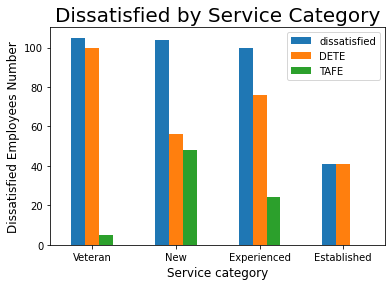

In [62]:
diss_sc.plot(kind='bar', rot = 0)
plt.title('Dissatisfied by Service Category', fontsize=20)
plt.xlabel('Service category', fontsize=12)
plt.ylabel('Dissatisfied Employees Number', fontsize=12)
plt.legend()

# Generally, the people who have served for more number of years or the ones who are older inn general are the ones to leave due to dissatisfaction in majority.
# Overall, 73% of the employees left the DETE institute because of dissatisfaction issues, while only 27% of the employees from the TAFE institute left because of dissatsifaction.